# Practical example

## Importing the relevant libraries

In [1]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:

raw_data = pd.read_csv('Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:

raw_data.describe(include='all') #include all to see categorical data as well

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [4]:

data = raw_data.drop(['Model'],axis=1) #axis =1 for column , it's better to drop model as it have 312 unique values
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


### Dealing with missing values

In [5]:

data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:

data_no_mv = data.dropna(axis=0) #axis = 0 for row 

In [7]:

data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

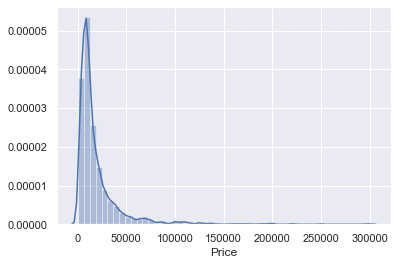

In [8]:

sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [9]:

q = data_no_mv['Price'].quantile(0.97)
# Then we can create a new df, with the condition that all prices must be below the 97 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 3% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3904,3904.000000,3904,3904.000000,3904.000000,3904,3904,3904.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1509,NaN,NaN,1790,3533,NaN
mean,NaN,16082.648299,NaN,168.296363,2.730789,NaN,NaN,2006.108607
std,NaN,14520.658287,NaN,101.330483,5.004271,NaN,NaN,6.611815
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,97.750000,1.800000,NaN,NaN,2002.000000
50%,NaN,11000.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20300.000000,NaN,231.000000,3.000000,NaN,NaN,2011.000000


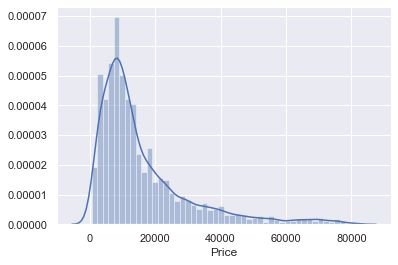

In [10]:

sns.distplot(data_1['Price'])

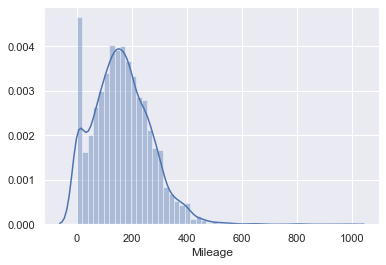

In [11]:

sns.distplot(data_no_mv['Mileage'])

In [12]:
q = data_1['Mileage'].quantile(0.98)
data_2 = data_1[data_1['Mileage']<q]

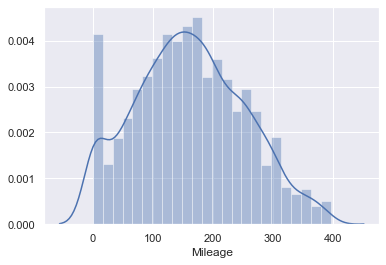

In [13]:

sns.distplot(data_2['Mileage'])

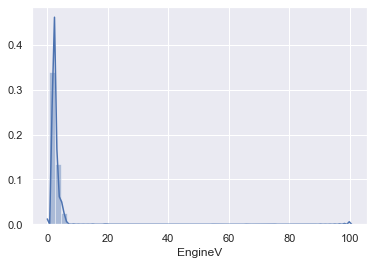

In [14]:

sns.distplot(data_no_mv['EngineV'])

In [15]:

# Car engine volumes are usually below 6.5l
# This is a prime example of the fact that a domain expert can help us in detecting outliers
data_3 = data_2[data_2['EngineV']<6.5]

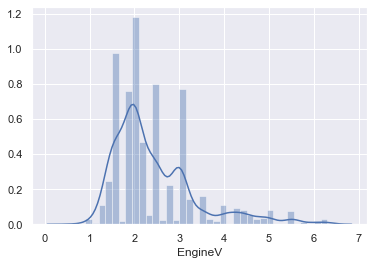

In [16]:

sns.distplot(data_3['EngineV'])

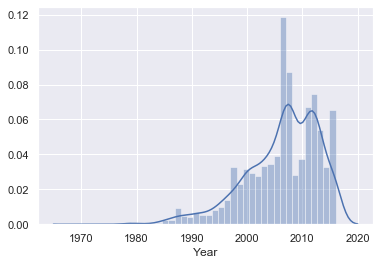

In [17]:

sns.distplot(data_no_mv['Year'])

In [18]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
q = data_3['Year'].quantile(0.12)
data_4 = data_3[data_3['Year']>q]

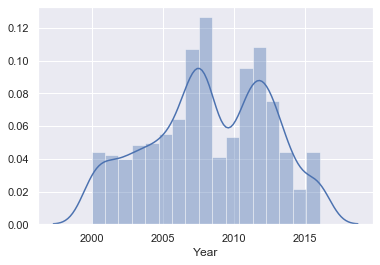

In [19]:

sns.distplot(data_4['Year'])

In [20]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6

data_cleaned = data_4.reset_index(drop=True)

In [21]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3275,3275.000000,3275,3275.000000,3275.000000,3275,3275,3275.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,743,NaN,1146,NaN,NaN,1578,3032,NaN
mean,NaN,18221.469881,NaN,147.857099,2.444024,NaN,NaN,2008.259237
std,NaN,14791.400002,NaN,82.629586,0.972768,NaN,NaN,4.270157
min,NaN,1200.000000,NaN,0.000000,0.600000,NaN,NaN,2000.000000
25%,NaN,8574.500000,NaN,89.000000,1.800000,NaN,NaN,2005.000000
50%,NaN,12900.000000,NaN,147.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22900.000000,NaN,200.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions
The linear regression has five key assumptions:

Linear relationship \
Multivariate normality\
No or little multicollinearity \
No auto-correlation \
Homoscedasticity

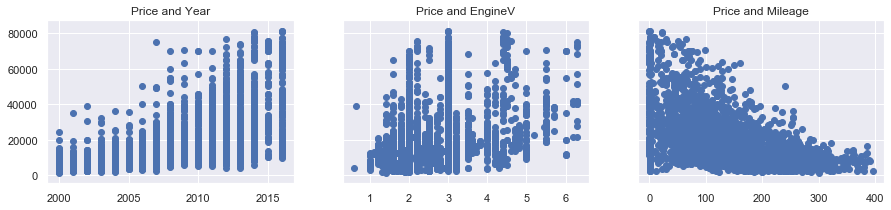

In [22]:

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

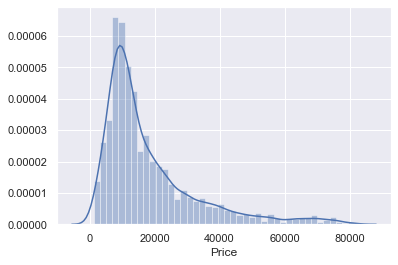

In [23]:

sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [24]:

log_price = np.log(data_cleaned['Price'])
# add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
1,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
2,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
3,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
4,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,9.287209
...,...,...,...,...,...,...,...,...,...
3270,Renault,2100.0,vagon,237,1.9,Diesel,no,2001,7.649693
3271,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678
3272,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3273,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556


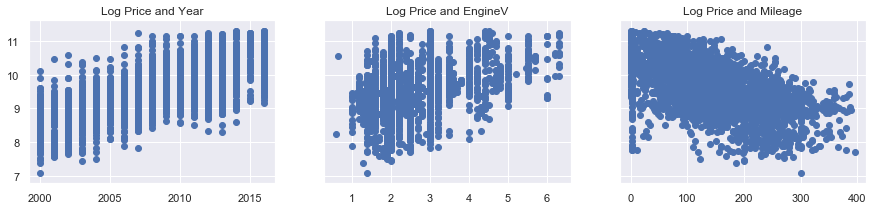

In [25]:

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship


In [26]:
#we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [27]:

data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [28]:

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

#we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

vif = pd.DataFrame()


vif["VIF"] = [VIF(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [29]:

vif

,VIF,Features
0,4.194886,Mileage
1,9.974975,Year
2,7.330324,EngineV


In [30]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
1,Audi,crossover,240,4.2,Petrol,yes,10.043249
2,Toyota,crossover,120,2.0,Petrol,yes,9.814656
3,Audi,vagon,200,2.7,Diesel,yes,9.560997
4,Renault,vagon,193,1.5,Diesel,yes,9.287209
...,...,...,...,...,...,...,...
3270,Renault,vagon,237,1.9,Diesel,no,7.649693
3271,Renault,sedan,152,1.6,Petrol,yes,8.824678
3272,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3273,Toyota,sedan,35,1.6,Petrol,yes,9.792556


## Create dummy variables

In [31]:

data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True) #drop_first = False lead to multicollinearity

In [32]:

data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,193,1.5,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


### Rearrange a bit

In [33]:
#choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [34]:

# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [35]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,9.287209,193,1.5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


## Linear regression model

### Declare the inputs and the targets

In [36]:
# The target(dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [37]:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

scaler.fit(inputs)

StandardScaler()

In [38]:

inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [39]:

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.20, random_state=365)

### Create the regression

In [40]:

reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

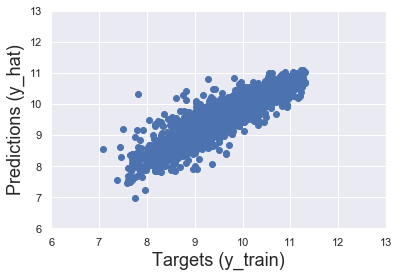

In [42]:

plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

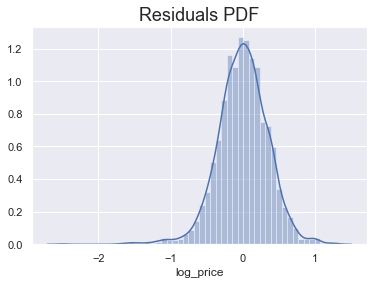

In [43]:

sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)



In [44]:
#residual follow normal distribution  

In [45]:
# Find the R-squared of the model
reg.score(x_train,y_train)
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.7764903320071128

### Finding the weights and bias

In [46]:

reg.intercept_

9.53895741914947

In [47]:

reg.coef_


array([-0.3790206 ,  0.19923157,  0.02483988, -0.01509243, -0.16359466,
       -0.21275665, -0.0821434 , -0.10124565, -0.11743685, -0.08213077,
       -0.14437159, -0.10063414, -0.1480287 , -0.08808893, -0.03124961,
       -0.13027777,  0.27814062])

In [48]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.379021
1,EngineV,0.199232
2,Brand_BMW,0.024840
3,Brand_Mercedes-Benz,-0.015092
4,Brand_Mitsubishi,-0.163595
5,Brand_Renault,-0.212757
6,Brand_Toyota,-0.082143
7,Brand_Volkswagen,-0.101246
8,Body_hatch,-0.117437
9,Body_other,-0.082131


In [49]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW',
       'Mitsubishi'], dtype=object)

## Testing

In [50]:

y_hat_test = reg.predict(x_test)

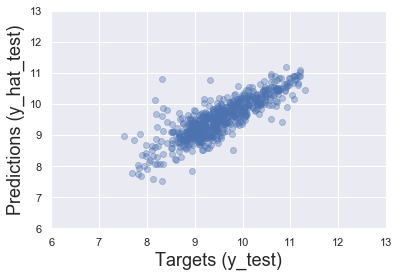

In [51]:

#  'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.35)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [52]:
lrPrediction = reg.predict(x_test)
from sklearn.metrics import r2_score
print('R2 value', r2_score(y_train, reg.predict(x_train)))
print('Accuracy', 100-(np.mean((np.abs(y_test-lrPrediction)/y_test))*100))

R2 value 0.7764903320071128
Accuracy 96.88367347454134


In [53]:

# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,43142.751858
1,13775.792022
2,7782.845023
3,13187.216771
4,32960.318016


In [54]:

df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,43142.751858,NaN
1,13775.792022,23000.0
2,7782.845023,NaN
3,13187.216771,NaN
4,32960.318016,NaN
...,...,...
650,13984.886955,NaN
651,7397.076646,NaN
652,10566.062008,6950.0
653,23575.011623,22900.0


In [55]:


# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

y_test.head()

0    11.058795
1     8.732305
2     8.948976
3     9.047821
4    10.434116
Name: log_price, dtype: float64

In [56]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,43142.751858,63500.0
1,13775.792022,6200.0
2,7782.845023,7700.0
3,13187.216771,8500.0
4,32960.318016,34000.0
...,...,...
650,13984.886955,10500.0
651,7397.076646,7800.0
652,10566.062008,12500.0
653,23575.011623,45000.0


In [57]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']


In [58]:

df_pf['Difference%'] =df_pf['Residual']/df_pf['Target']
df_pf


,Prediction,Target,Residual,Difference%
0,43142.751858,63500.0,20357.248142,0.320587
1,13775.792022,6200.0,-7575.792022,-1.221902
2,7782.845023,7700.0,-82.845023,-0.010759
3,13187.216771,8500.0,-4687.216771,-0.551437
4,32960.318016,34000.0,1039.681984,0.030579
...,...,...,...,...
650,13984.886955,10500.0,-3484.886955,-0.331894
651,7397.076646,7800.0,402.923354,0.051657
652,10566.062008,12500.0,1933.937992,0.154715
653,23575.011623,45000.0,21424.988377,0.476111


In [59]:

# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,43142.751858,63500.0,20357.248142,32.058658
1,13775.792022,6200.0,-7575.792022,122.190194
2,7782.845023,7700.0,-82.845023,1.075909
3,13187.216771,8500.0,-4687.216771,55.143727
4,32960.318016,34000.0,1039.681984,3.057888
...,...,...,...,...
650,13984.886955,10500.0,-3484.886955,33.189400
651,7397.076646,7800.0,402.923354,5.165684
652,10566.062008,12500.0,1933.937992,15.471504
653,23575.011623,45000.0,21424.988377,47.611085


In [60]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,655.000000,655.000000,655.000000,655.000000
mean,16811.688340,17834.250687,1022.562347,33.730610
std,11213.766784,14318.091318,7557.630236,61.594992
min,1848.069506,1850.000000,-45508.652971,0.011936
25%,8946.960400,8500.000000,-2563.757052,11.242908
50%,13680.766938,12800.000000,92.661819,23.739670
75%,21348.202383,22000.000000,3544.035733,37.559467
max,71756.511719,81500.000000,46934.648751,1109.967146


In [61]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
205,28946.54,28950.00,3.46,0.01
472,13721.74,13700.00,-21.74,0.16
499,13154.41,13200.00,45.59,0.35
48,23707.34,23800.00,92.66,0.39
203,13432.31,13499.00,66.69,0.49
127,10040.79,9990.00,-50.79,0.51
174,8946.89,8900.00,-46.89,0.53
608,7853.08,7800.00,-53.08,0.68
338,23703.79,23900.00,196.21,0.82
64,14377.89,14500.00,122.11,0.84
